In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
organizations_uciml_human_activity_recognition_with_smartphones_path = kagglehub.dataset_download('organizations/uciml/human-activity-recognition-with-smartphones')

print('Data source import complete.')


### Link to Kaggle: https://www.kaggle.com/code/prasadmeesala/human-activity-recognition-lstm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing, metrics
import tensorflow as tf

In [2]:
train_path = r"archive/train.csv"
test_path = r"archive/test.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print(df_train.shape, df_test.shape)

(7352, 563) (2947, 563)


In [3]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
df_train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
# Count of NA values in each column

print(df_train.isna().sum())
print("\n\nTotal NA values:", df_train.isna().sum().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


Total NA values: 0


In [7]:
print(df_train["Activity"].value_counts(), "\n\n")
print(df_test["Activity"].value_counts())

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64 


Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64


In [8]:
activites = df_train["Activity"].unique()

class_map = {i : val for i, val in enumerate(activites)}
class_map_reverse = {key : val for val, key in class_map.items()}

print(class_map)

{0: 'STANDING', 1: 'SITTING', 2: 'LAYING', 3: 'WALKING', 4: 'WALKING_DOWNSTAIRS', 5: 'WALKING_UPSTAIRS'}


In [9]:
df_train["Activity"] = df_train["Activity"].apply(lambda x : class_map_reverse[x])
df_test["Activity"] = df_test["Activity"].apply(lambda x : class_map_reverse[x])

In [10]:
df_train.drop("subject", axis = 1, inplace = True)
df_test.drop("subject", axis = 1, inplace = True)

In [11]:
time_steps = 10

def create_sequences(X, y, time_steps = 5):
    X_, y_ = [], []
    n = X.shape[0]
    for i in np.arange(n - time_steps):
        X_.append(X[i:(i + time_steps)])
        y_.append(y[i + time_steps])
    return np.array(X_), np.array(y_)

X_train_ = df_train.drop("Activity", axis = 1).values
X_test_ = df_test.drop("Activity", axis = 1).values
y_train_ = df_train["Activity"].values
y_test_ = df_test["Activity"].values

X_train, y_train = create_sequences(X_train_, y_train_, time_steps)
X_test, y_test = create_sequences(X_test_, y_test_, time_steps)

print(X_train.shape, X_test.shape)

(7342, 10, 561) (2937, 10, 561)


### Model Training

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = X_train.shape[1:]),
    tf.keras.layers.LSTM(units = 256, return_sequences = True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(units = 128, return_sequences = True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(units = 64),
    tf.keras.layers.Dense(units = 32, activation = "relu"),
    tf.keras.layers.Dense(units = len(class_map), activation = "softmax")
])

model.compile(optimizer = tf.keras.optimizers.Adam(0.005), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 256)        │       837,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,086,438 (4.14 MB)

 Trainable params: 1,086,438 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.3, callbacks = cb)

Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.6283 - loss: 0.7428 - val_accuracy: 0.6514 - val_loss: 0.7342
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.6892 - loss: 0.6366 - val_accuracy: 0.7844 - val_loss: 0.4473
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.8118 - loss: 0.4492 - val_accuracy: 0.7621 - val_loss: 0.5739
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.8484 - loss: 0.4004 - val_accuracy: 0.8620 - val_loss: 0.3785
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.8578 - loss: 0.3749 - val_accuracy: 0.8366 - val_loss: 0.5311
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.8718 - loss: 0.3644 - val_accuracy: 0.8997 - val_loss: 0.3313
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.9032 - loss: 0.3000 - val_accuracy: 0.9069 - val_loss: 0.3017
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 30s 186ms/step - accuracy: 0.9118 - loss: 0.2873 -

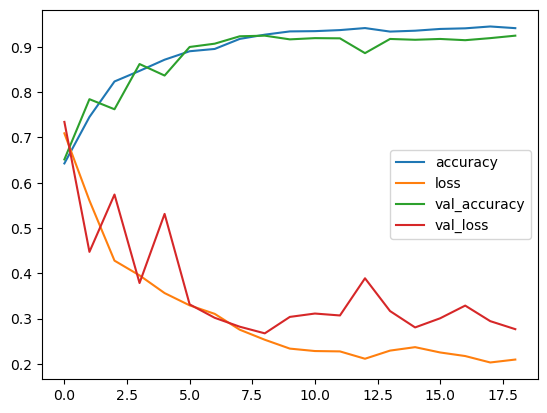

In [15]:
history_df = pd.DataFrame(history.history)
history_df.plot()
plt.show()

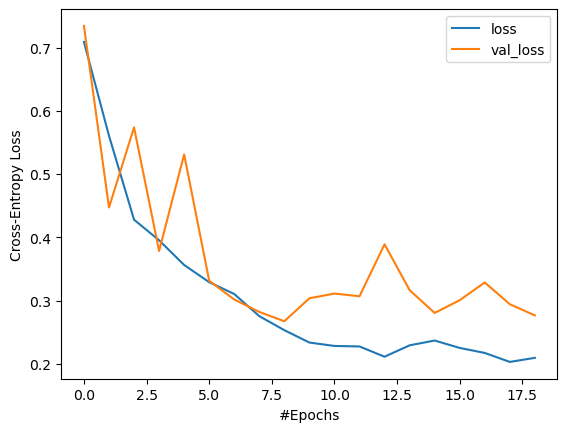

In [16]:
history_df[["loss", "val_loss"]].plot()
plt.xlabel("#Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.show()

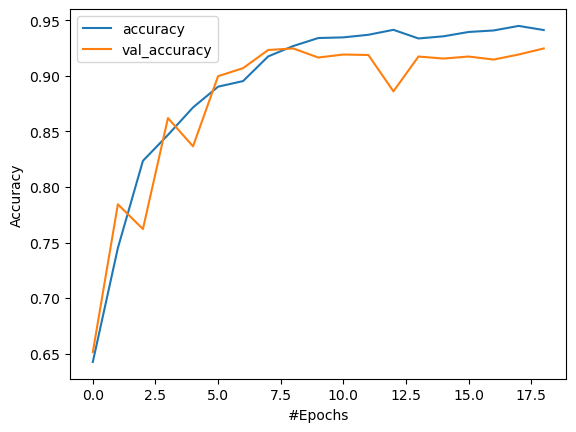

In [17]:
history_df[["accuracy", "val_accuracy"]].plot()
plt.xlabel("#Epochs")
plt.ylabel("Accuracy")
plt.show()

### Model Evaluation

In [18]:
model.evaluate(X_test, y_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8908 - loss: 0.3496


[0.33382007479667664, 0.8958120346069336]

In [19]:
y_test_pred_probs = model.predict(X_test)
y_test_pred = np.array([np.argmax(probs) for probs in y_test_pred_probs])

92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


In [20]:
clf_report = metrics.classification_report(y_test, y_test_pred, digits = 4)
print(clf_report)

              precision    recall  f1-score   support

           0     0.9228    0.8467    0.8831       522
           1     0.8255    0.9246    0.8722       491
           2     0.9674    0.9404    0.9537       537
           3     0.8994    0.9375    0.9181       496
           4     0.8609    0.8548    0.8578       420
           5     0.8982    0.8620    0.8797       471

    accuracy                         0.8958      2937
   macro avg     0.8957    0.8943    0.8941      2937
weighted avg     0.8979    0.8958    0.8960      2937



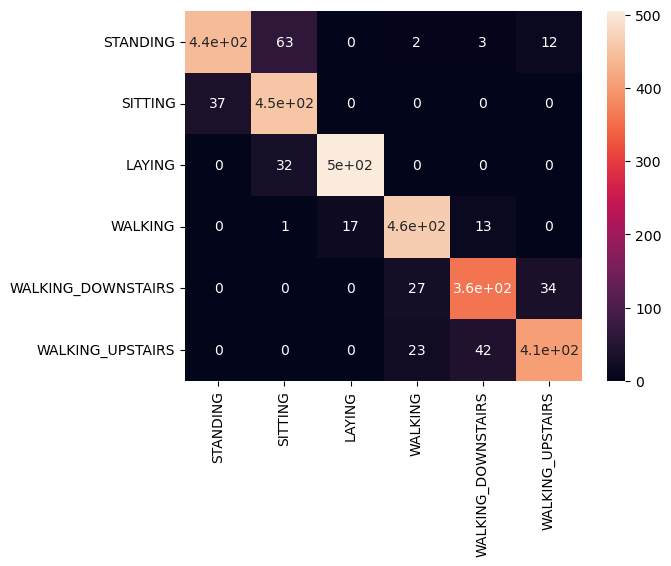

In [21]:
conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True, xticklabels = class_map.values(), yticklabels = class_map.values())
plt.show()